# Comparative Analysis
In this notebook, we compare Window with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm
from itertools import product

In [3]:
from src.visualizer import plot_clasp, plot_clasp_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
costs = ("l1", "l2", "normal", "ar") # "rank", "mahalanobis"
thresholds = np.round(np.arange(.01, .11, .01), 2)

methods = list()

for cost, t in product(costs, thresholds):
    candidate_name = f"{cost}-cost-{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/window_cost_threshold/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,l1-cost-0.01-threshold,l1-cost-0.02-threshold,l1-cost-0.03-threshold,l1-cost-0.04-threshold,l1-cost-0.05-threshold,l1-cost-0.06-threshold,l1-cost-0.07-threshold,l1-cost-0.08-threshold,l1-cost-0.09-threshold,...,ar-cost-0.01-threshold,ar-cost-0.02-threshold,ar-cost-0.03-threshold,ar-cost-0.04-threshold,ar-cost-0.05-threshold,ar-cost-0.06-threshold,ar-cost-0.07-threshold,ar-cost-0.08-threshold,ar-cost-0.09-threshold,ar-cost-0.1-threshold
0,DodgerLoopDay,0.446,0.635,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.516,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,EEGRat,0.660,0.678,0.719,0.719,0.692,0.914,0.916,0.918,0.930,...,0.508,0.496,0.714,0.712,0.704,0.762,0.754,0.737,0.867,0.773
2,EEGRat2,0.577,0.787,0.500,0.500,0.500,0.500,0.500,0.500,0.500,...,0.347,0.686,0.660,0.621,0.633,0.633,0.633,0.633,0.546,0.546
3,FaceFour,0.430,0.498,0.450,0.281,0.281,0.281,0.281,0.281,0.281,...,0.434,0.528,0.392,0.399,0.399,0.484,0.484,0.281,0.281,0.281
4,GrandMalSeizures2,0.158,0.158,0.173,0.212,0.242,0.244,0.356,0.596,0.591,...,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078
5,GreatBarbet1,0.366,0.535,0.742,0.834,0.840,0.825,0.918,0.920,0.922,...,0.395,0.641,0.804,0.905,0.960,0.710,0.710,0.355,0.355,0.355
6,Herring,0.114,0.554,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.365,0.726,0.329,0.358,0.358,0.358,0.358,0.358,0.358,...,0.561,0.554,0.358,0.358,0.358,0.358,0.358,0.358,0.358,0.358
8,InsectEPG1,0.910,0.960,0.653,0.653,0.653,0.653,0.653,0.653,0.653,...,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.549,0.642,0.286,0.149,0.149,0.149,0.149,0.149,0.149,...,0.317,0.710,0.728,0.789,0.606,0.587,0.438,0.149,0.149,0.149


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2267/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


l1-cost-0.01-threshold        0.414
l1-cost-0.02-threshold        0.505
l1-cost-0.03-threshold        0.509
l1-cost-0.04-threshold        0.456
l1-cost-0.05-threshold        0.450
l1-cost-0.06-threshold        0.449
l1-cost-0.07-threshold        0.459
l1-cost-0.08-threshold        0.470
l1-cost-0.09-threshold        0.471
l1-cost-0.1-threshold         0.457
l2-cost-0.01-threshold        0.290
l2-cost-0.02-threshold        0.393
l2-cost-0.03-threshold        0.429
l2-cost-0.04-threshold        0.452
l2-cost-0.05-threshold        0.440
l2-cost-0.06-threshold        0.447
l2-cost-0.07-threshold        0.437
l2-cost-0.08-threshold        0.438
l2-cost-0.09-threshold        0.431
l2-cost-0.1-threshold         0.419
normal-cost-0.01-threshold    0.238
normal-cost-0.02-threshold    0.328
normal-cost-0.03-threshold    0.407
normal-cost-0.04-threshold    0.454
normal-cost-0.05-threshold    0.459
normal-cost-0.06-threshold    0.452
normal-cost-0.07-threshold    0.482
normal-cost-0.08-threshold  

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2267/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


l1-cost-0.01-threshold        0.230
l1-cost-0.02-threshold        0.239
l1-cost-0.03-threshold        0.280
l1-cost-0.04-threshold        0.287
l1-cost-0.05-threshold        0.284
l1-cost-0.06-threshold        0.301
l1-cost-0.07-threshold        0.305
l1-cost-0.08-threshold        0.306
l1-cost-0.09-threshold        0.307
l1-cost-0.1-threshold         0.292
l2-cost-0.01-threshold        0.204
l2-cost-0.02-threshold        0.211
l2-cost-0.03-threshold        0.249
l2-cost-0.04-threshold        0.284
l2-cost-0.05-threshold        0.288
l2-cost-0.06-threshold        0.295
l2-cost-0.07-threshold        0.289
l2-cost-0.08-threshold        0.290
l2-cost-0.09-threshold        0.279
l2-cost-0.1-threshold         0.280
normal-cost-0.01-threshold    0.142
normal-cost-0.02-threshold    0.197
normal-cost-0.03-threshold    0.219
normal-cost-0.04-threshold    0.237
normal-cost-0.05-threshold    0.235
normal-cost-0.06-threshold    0.236
normal-cost-0.07-threshold    0.255
normal-cost-0.08-threshold  

Let's filter the methods to exclude the bad combinations.

In [8]:
df_best_scores = df_scores[df_scores.columns[1:][df_scores.mean(axis=0) > .49]]
df_best_scores

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_2267/575436065.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_best_scores = df_scores[df_scores.columns[1:][df_scores.mean(axis=0) > .49]]


,l1-cost-0.02-threshold,l1-cost-0.03-threshold,normal-cost-0.08-threshold,normal-cost-0.09-threshold,normal-cost-0.1-threshold,ar-cost-0.02-threshold,ar-cost-0.03-threshold,ar-cost-0.04-threshold,ar-cost-0.05-threshold,ar-cost-0.06-threshold,ar-cost-0.07-threshold
0,0.635,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,0.678,0.719,0.529,0.530,0.534,0.496,0.714,0.712,0.704,0.762,0.754
2,0.787,0.500,0.500,0.500,0.500,0.686,0.660,0.621,0.633,0.633,0.633
3,0.498,0.450,0.753,0.753,0.756,0.528,0.392,0.399,0.399,0.484,0.484
4,0.158,0.173,0.767,0.768,0.791,0.078,0.078,0.078,0.078,0.078,0.078
5,0.535,0.742,0.850,0.863,0.630,0.641,0.804,0.905,0.960,0.710,0.710
6,0.554,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,0.726,0.329,0.460,0.459,0.358,0.554,0.358,0.358,0.358,0.358,0.358
8,0.960,0.653,0.221,0.249,0.258,0.653,0.653,0.653,0.653,0.653,0.653
9,0.642,0.286,0.149,0.149,0.149,0.710,0.728,0.789,0.606,0.587,0.438


Let's compute the wins per method.

In [9]:
ranks = df_best_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [10]:
for mean, name in zip(means, df_best_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

l1-cost-0.03-threshold:wins=7 rank=5.47619
normal-cost-0.08-threshold:wins=2 rank=4.95238
normal-cost-0.09-threshold:wins=3 rank=4.85714
normal-cost-0.1-threshold:wins=5 rank=4.57143
ar-cost-0.02-threshold:wins=2 rank=4.7619
ar-cost-0.03-threshold:wins=3 rank=4.71429
ar-cost-0.04-threshold:wins=3 rank=4.61905
ar-cost-0.05-threshold:wins=4 rank=4.33333
ar-cost-0.06-threshold:wins=4 rank=3.52381
ar-cost-0.07-threshold:wins=3 rank=3.42857


Let's plot and output the ranks.

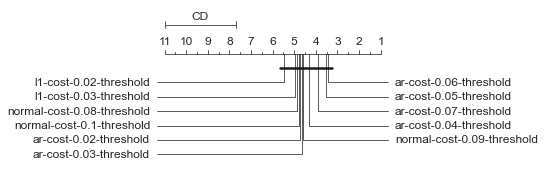

In [16]:
cd = Orange.evaluation.scoring.compute_CD(means, df_best_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, ranks.columns, cd=cd, reverse=True, width=5, filename="../../figures/cd_ablation_window_cost_threshold.pdf")

Let's compute wins/losses against ClaSP.

In [12]:
selection = "ar-cost-0.06-threshold"

for rival in df_best_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ar-cost-0.06-threshold vs l1-cost-0.03-threshold: (wins/ties/losses): 11/3/7
ar-cost-0.06-threshold vs normal-cost-0.08-threshold: (wins/ties/losses): 8/7/6
ar-cost-0.06-threshold vs normal-cost-0.09-threshold: (wins/ties/losses): 8/7/6
ar-cost-0.06-threshold vs normal-cost-0.1-threshold: (wins/ties/losses): 9/8/4
ar-cost-0.06-threshold vs ar-cost-0.02-threshold: (wins/ties/losses): 7/7/7
ar-cost-0.06-threshold vs ar-cost-0.03-threshold: (wins/ties/losses): 7/10/4
ar-cost-0.06-threshold vs ar-cost-0.04-threshold: (wins/ties/losses): 8/11/2
ar-cost-0.06-threshold vs ar-cost-0.05-threshold: (wins/ties/losses): 4/14/3
ar-cost-0.06-threshold vs ar-cost-0.07-threshold: (wins/ties/losses): 5/14/2


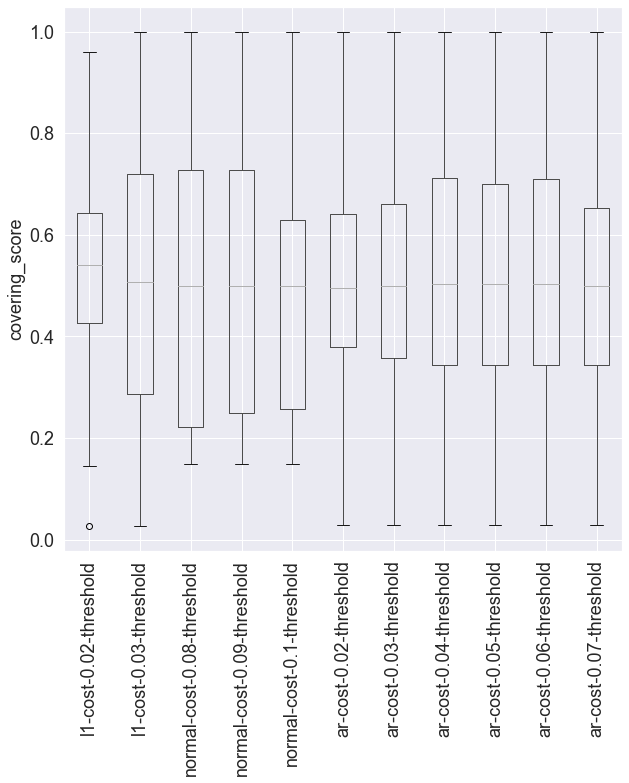

In [13]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_best_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig("../../figures/bp_ablation_window_cost_threshold.pdf", bbox_inches="tight") 